# Crypto Market Prediction using Machine Learning and Deep Learning

### Problem Statement

Predicting the crypto prices based on the historical data using machine learning techniques like Moving Avergae, Linear Regression and k-Nearest Neighbors and Deep learning algo LSTM.

Data is gather  yahoo finance for past 5years and we will be using Adj Close as a input feature and predict the on validation dataset.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import yfinance as yf
from sklearn.metrics import r2_score

In [2]:
from cryptocmd import CmcScraper

# initialise scraper with time interval for e.g a year from today
scraper = CmcScraper("BTC", "12-12-2020", "12-12-2021")
# Pandas dataFrame for the same data
df = scraper.get_dataframe()

In [3]:
df

,Date,Open,High,Low,Close,Volume,Market Cap,Time Open,Time High,Time Low,Time Close
0,2021-12-12,49354.854935,50724.865740,48725.853023,50098.335136,2.193922e+10,9.468231e+11,2021-12-12T00:00:00.000Z,2021-12-12T18:16:02.000Z,2021-12-12T10:12:02.000Z,2021-12-12T23:59:59.999Z
1,2021-12-11,47264.634703,49458.212788,46942.347821,49362.508336,2.577587e+10,9.328730e+11,2021-12-11T00:00:00.000Z,2021-12-11T23:37:02.000Z,2021-12-11T00:19:02.000Z,2021-12-11T23:59:59.999Z
2,2021-12-10,47642.143553,50015.252987,47023.698021,47243.305685,3.096601e+10,8.927777e+11,2021-12-10T00:00:00.000Z,2021-12-10T13:37:02.000Z,2021-12-10T23:55:02.000Z,2021-12-10T23:59:59.999Z
3,2021-12-09,50450.082052,50797.165441,47358.353271,47672.122391,2.960358e+10,9.008351e+11,2021-12-09T00:00:00.000Z,2021-12-09T00:16:02.000Z,2021-12-09T20:46:04.000Z,2021-12-09T23:59:59.999Z
4,2021-12-08,50667.647683,51171.375310,48765.986921,50504.795539,2.847970e+10,9.543124e+11,2021-12-08T00:00:00.000Z,2021-12-08T15:24:02.000Z,2021-12-08T12:26:02.000Z,2021-12-08T23:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-16,19418.818401,21458.907897,19298.317277,21310.598131,4.440901e+10,3.957999e+11,2020-12-16T00:00:00.000Z,2020-12-16T23:19:41.000Z,2020-12-16T00:31:39.000Z,2020-12-16T23:59:59.999Z
362,2020-12-15,19246.919984,19525.007591,19079.842377,19417.076033,2.674198e+10,3.606148e+11,2020-12-15T00:00:00.000Z,2020-12-15T20:08:41.000Z,2020-12-15T05:19:41.000Z,2020-12-15T23:59:59.999Z
363,2020-12-14,19144.492460,19305.100443,19012.709408,19246.644341,2.247400e+10,3.574326e+11,2020-12-14T00:00:00.000Z,2020-12-14T23:21:27.000Z,2020-12-14T01:04:41.000Z,2020-12-14T23:59:59.999Z
364,2020-12-13,18806.766479,19381.535773,18734.332888,19142.382534,2.545047e+10,3.554792e+11,2020-12-13T00:00:00.000Z,2020-12-13T13:07:39.000Z,2020-12-13T00:40:43.000Z,2020-12-13T23:59:59.999Z


### Getting Data

In [4]:
import yfinance as yf
import datetime as dt
import pandas_datareader as web


min_value = dt.datetime.today() - dt.timedelta(5 * 365)
max_value = dt.datetime.today()

a = min_value.strftime('%d-%m-%Y')
b = max_value.strftime('%d-%m-%Y')
# initialise scraper with time interval for e.g a year from today
scraper_btc = CmcScraper("BTC", a, b)
# Pandas dataFrame for the same data
btc = scraper_btc.get_dataframe()

scraper_eth = CmcScraper("ETH", a, b)
# Pandas dataFrame for the same data
eth = scraper_eth.get_dataframe()


We will implement our models/techniques on different 3 stocks based on market size.

In [5]:
btc.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Time Open,Time High,Time Low,Time Close
0,2024-04-23,66839.894512,67199.241946,65864.867659,66407.271799,2.431098e+10,1.307513e+12,2024-04-23T00:00:00.000Z,2024-04-23T01:16:00.000Z,2024-04-23T12:47:00.000Z,2024-04-23T23:59:59.999Z
1,2024-04-22,64935.633170,67233.957036,64548.178584,66837.676091,2.828269e+10,1.315995e+12,2024-04-22T00:00:00.000Z,2024-04-22T23:13:00.000Z,2024-04-22T02:09:00.000Z,2024-04-22T23:59:59.999Z
2,2024-04-21,64992.816610,65723.239828,64277.721429,64926.643212,2.050664e+10,1.278296e+12,2024-04-21T00:00:00.000Z,2024-04-21T03:13:00.000Z,2024-04-21T16:39:00.000Z,2024-04-21T23:59:59.999Z
3,2024-04-20,63851.100036,65442.458954,63172.403909,64994.440068,2.309749e+10,1.279569e+12,2024-04-20T00:00:00.000Z,2024-04-20T17:32:00.000Z,2024-04-20T01:04:00.000Z,2024-04-20T23:59:59.999Z
4,2024-04-19,63510.750320,65481.597054,59651.390265,63843.568502,4.992043e+10,1.257064e+12,2024-04-19T00:00:00.000Z,2024-04-19T12:22:00.000Z,2024-04-19T02:31:00.000Z,2024-04-19T23:59:59.999Z


In [6]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1825 non-null   datetime64[ns]
 1   Open        1825 non-null   float64       
 2   High        1825 non-null   float64       
 3   Low         1825 non-null   float64       
 4   Close       1825 non-null   float64       
 5   Volume      1825 non-null   float64       
 6   Market Cap  1825 non-null   float64       
 7   Time Open   1825 non-null   object        
 8   Time High   1825 non-null   object        
 9   Time Low    1825 non-null   object        
 10  Time Close  1825 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 157.0+ KB


### Moving Average

The predicted closing price for each day will be the average of a set of previously observed values. Instead of using the simple average, we will be using the moving average technique which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set. Here is a simple figure that will help you understand this with more clarity.

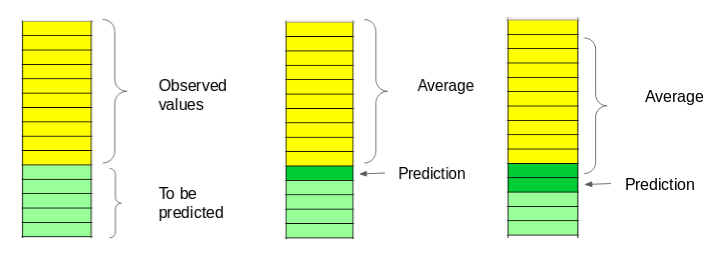

#### On BTC


Let's implement Moving Average on BTC first.

(990, 2)
(835, 2)

RMSE value on validation set:
178123.21246122732
-18905.36464769743


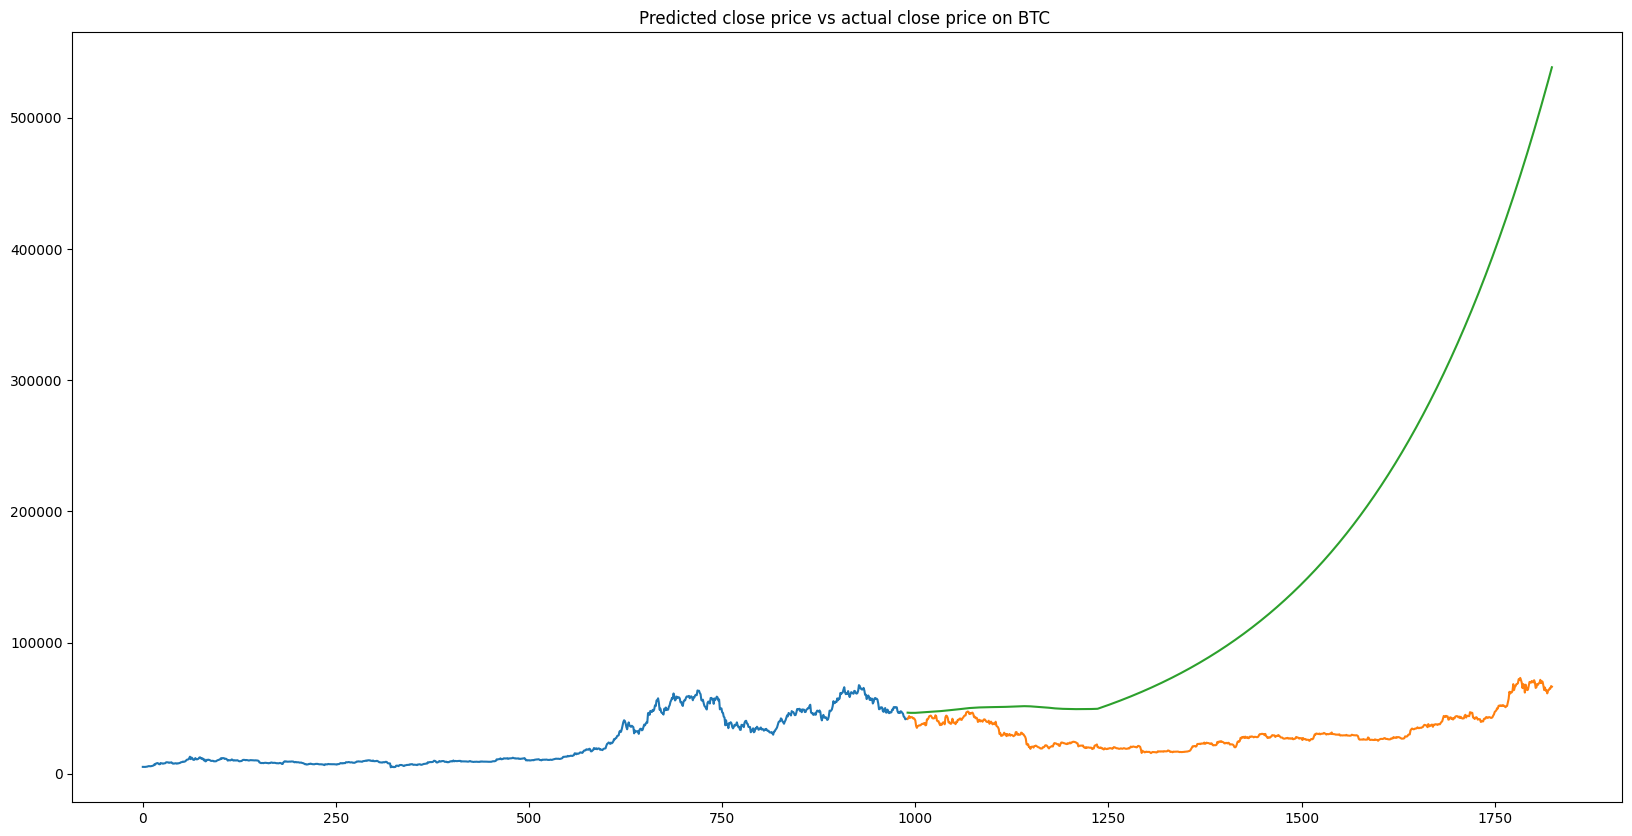

In [7]:
btc.index=btc['Date']

btc_df = btc.sort_index(ascending=True, axis=0)
btc_new = pd.DataFrame(index=range(0, len(btc)), columns=['Date', 'Close'])

for i in range(0,len(btc_df)):
    btc_new['Date'][i] = btc_df['Date'][i]
    btc_new['Close'][i] = btc_df['Close'][i]

#splitting training and validation dataset
train = btc_new[:990]
valid = btc_new[990:]

#shapes of training set
print(train.shape)

#shapes of valid set
print(valid.shape)

preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-246+i:].sum() + sum(preds)
    b = a/246
    preds.append(b)
    
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\nRMSE value on validation set:')
print(rms)

acc = r2_score(valid['Close'], preds)*100
print(acc)
#plot
valid=valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.title('Predicted close price vs actual close price on BTC ');

#### On ETH

(990, 2)
(835, 2)

RMSE value on validation set:
13336.766687458545
-39412.80750770097


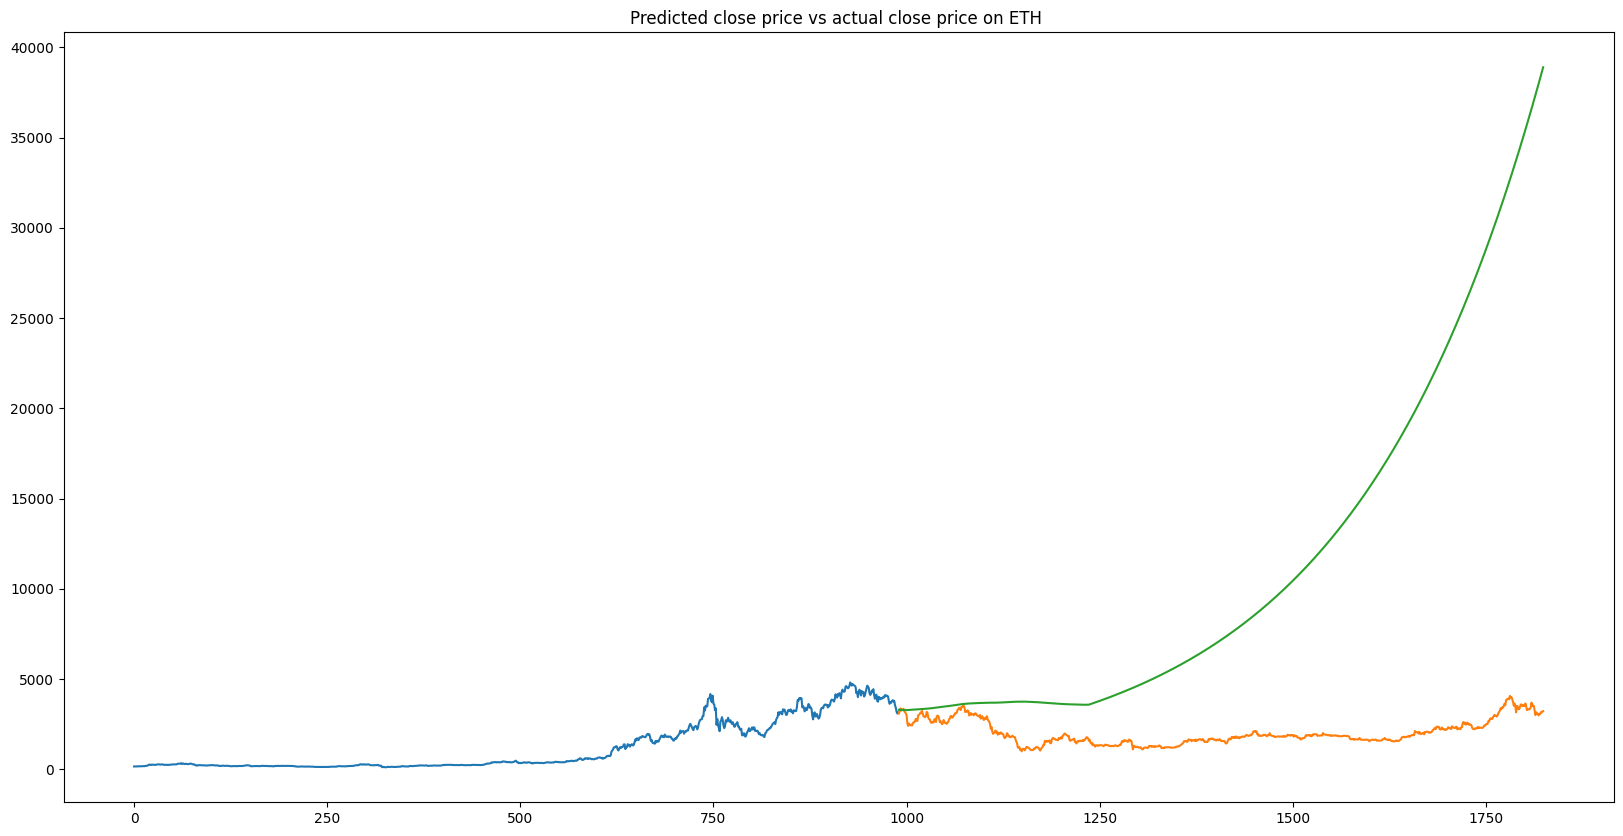

In [8]:
eth.index=eth['Date']

eth_df = eth.sort_index(ascending=True, axis=0)
eth_new = pd.DataFrame(index=range(0, len(eth)), columns=['Date', 'Close'])

for i in range(0,len(eth_df)):
    eth_new['Date'][i] = eth_df['Date'][i]
    eth_new['Close'][i] = eth_df['Close'][i]

#splitting training and validation dataset
train = eth_new[:990]
valid = eth_new[990:]

#shapes of training set
print(train.shape)

#shapes of valid set
print(valid.shape)

preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-246+i:].sum() + sum(preds)
    b = a/246
    preds.append(b)
    
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\nRMSE value on validation set:')
print(rms)

acc = r2_score(valid['Close'], preds)*100
print(acc)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.title('Predicted close price vs actual close price on ETH ');

#### Inference

The RMSE value is minimum but the results are not very promising (as you can gather from the plot). The predicted values are of the same range as the observed values in the train set (there is an increasing trend initially and then a slow decrease).

### k-Nearest Neighbors

Another interesting ML algorithm that one can use here is kNN (k nearest neighbours). Based on the independent variables, kNN finds the similarity between new data points and old data points. 


#### On BTC

In [10]:
#create features
btc_new = btc.copy()
btc_new['Date'] = btc_new['Date'].astype('datetime64[ns]')
btc_new["Year"] = btc_new.Date.dt.year
btc_new["Month"] = btc_new.Date.dt.month
btc_new["Day"] = btc_new.Date.dt.day
btc_new["DayOfWeek"] = btc_new.Date.dt.dayofweek
btc_new["DayOfYear"] = btc_new.Date.dt.dayofyear



In [11]:
btc_new.drop('Date', axis=1,inplace=True)

In [12]:
btc_new.reset_index(inplace=True)

In [13]:
btc_new.drop('Date', axis=1,inplace=True)

In [14]:
btc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1825 non-null   float64
 1   High        1825 non-null   float64
 2   Low         1825 non-null   float64
 3   Close       1825 non-null   float64
 4   Volume      1825 non-null   float64
 5   Market Cap  1825 non-null   float64
 6   Year        1825 non-null   int64  
 7   Month       1825 non-null   int64  
 8   Day         1825 non-null   int64  
 9   DayOfWeek   1825 non-null   int64  
 10  DayOfYear   1825 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 157.0 KB


In [15]:
btc_new.sort_index(ascending=False, inplace=True)

In [16]:
btc_new.reset_index(inplace=True)

In [17]:
btc_new.drop('index', axis=1, inplace=True)

In [18]:
btc_new.head()

,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day,DayOfWeek,DayOfYear
0,11475.299805,12040.299805,11475.299805,11786.299805,8.350360e+09,1.983899e+11,2018,1,28,6,28
1,11755.500000,11875.599609,11179.200195,11296.400391,7.107360e+09,1.901644e+11,2018,1,29,0,29
2,11306.799805,11307.200195,10036.200195,10106.299805,8.637860e+09,1.701516e+11,2018,1,30,1,30
3,10108.200195,10381.599609,9777.419922,10221.099609,8.041160e+09,1.720996e+11,2018,1,31,2,31
4,10237.299805,10288.799805,8812.280273,9170.540039,9.959400e+09,1.544286e+11,2018,2,1,3,32


Model Fitted!
RMSE is 27008.131123782998
-243.95609517051201


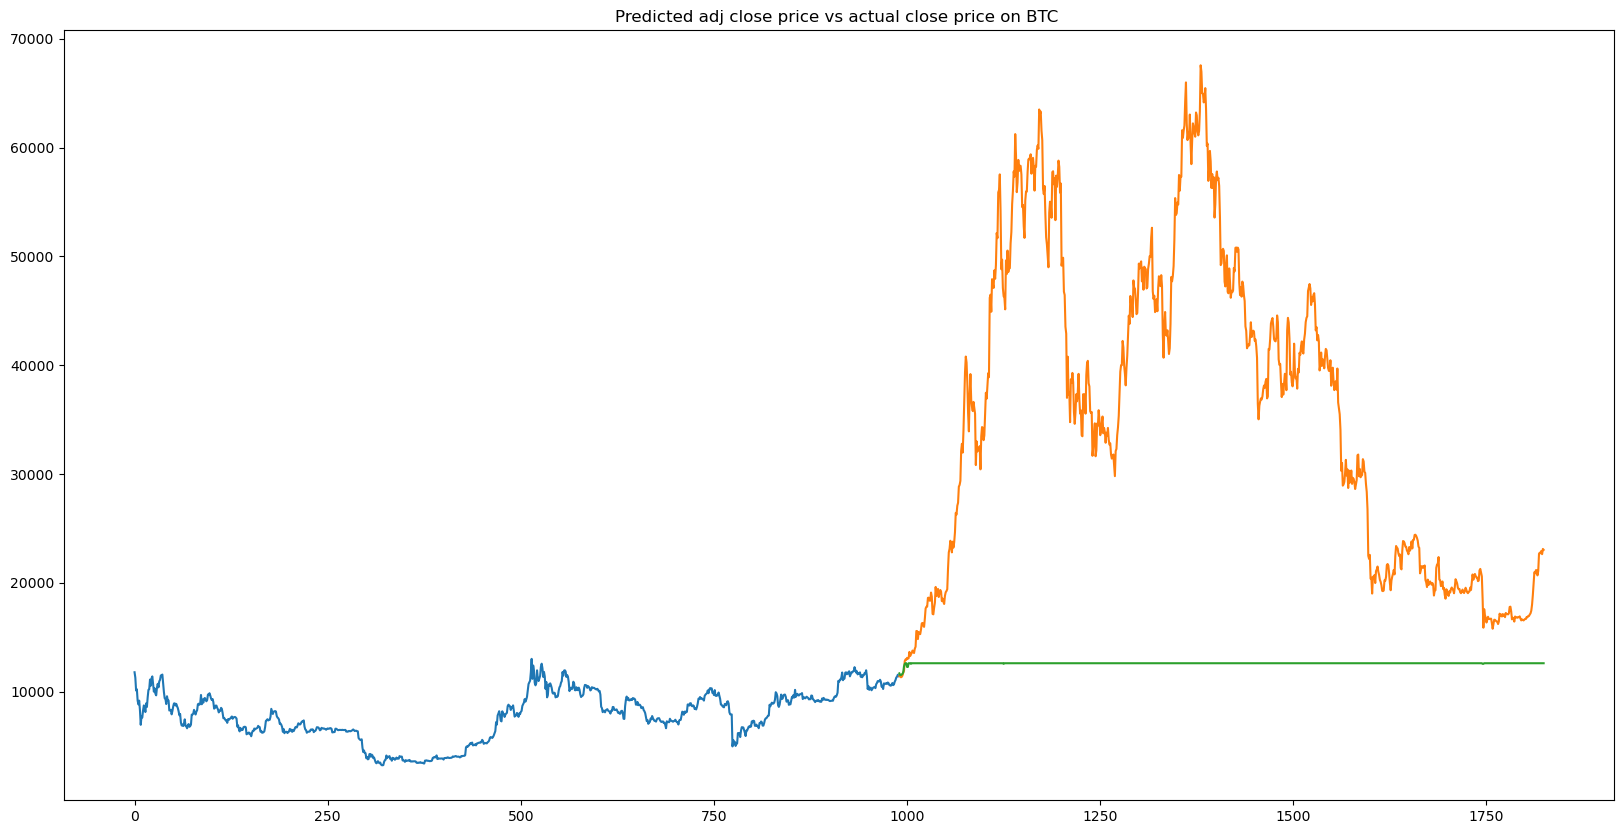

In [19]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
#split into train and validation
train = btc_new[:990]
valid = btc_new[990:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
print('Model Fitted!')

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)


acc = r2_score(valid['Close'], preds)*100
print(acc)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.title('Predicted adj close price vs actual close price on BTC ');


#### On ETH


In [20]:
#create features
eth_new = eth.copy()
eth_new['Date'] = eth_new['Date'].astype('datetime64[ns]')
eth_new["Year"] = eth_new.Date.dt.year
eth_new["Month"] = eth_new.Date.dt.month
eth_new["Day"] = eth_new.Date.dt.day
eth_new["DayOfWeek"] = eth_new.Date.dt.dayofweek
eth_new["DayOfYear"] = eth_new.Date.dt.dayofyear

eth_new.drop('Date', axis=1,inplace=True)

In [21]:
eth_new.reset_index(inplace=True)


In [22]:
eth_new.drop('Date', axis=1,inplace=True)

In [23]:
eth_new.sort_index(inplace=True, ascending=False)


In [24]:
eth_new.reset_index(inplace=True)

In [25]:
eth_new.drop('index', axis=1, inplace=True)

In [26]:
eth_new.head()

,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day,DayOfWeek,DayOfYear
0,1111.780029,1257.770020,1111.780029,1246.010010,5.372330e+09,1.212016e+11,2018,1,28,6,28
1,1246.699951,1256.699951,1169.079956,1182.359985,3.715080e+09,1.150346e+11,2018,1,29,0,29
2,1184.130005,1184.630005,1058.969971,1071.130005,4.107860e+09,1.042345e+11,2018,1,30,1,30
3,1071.089966,1128.660034,1034.500000,1118.310059,3.757560e+09,1.088486e+11,2018,1,31,2,31
4,1119.369995,1161.349976,984.818970,1036.790039,5.261680e+09,1.009354e+11,2018,2,1,3,32


Model Fitted!
RMSE is 1432.462699082611
-75.13646915929422


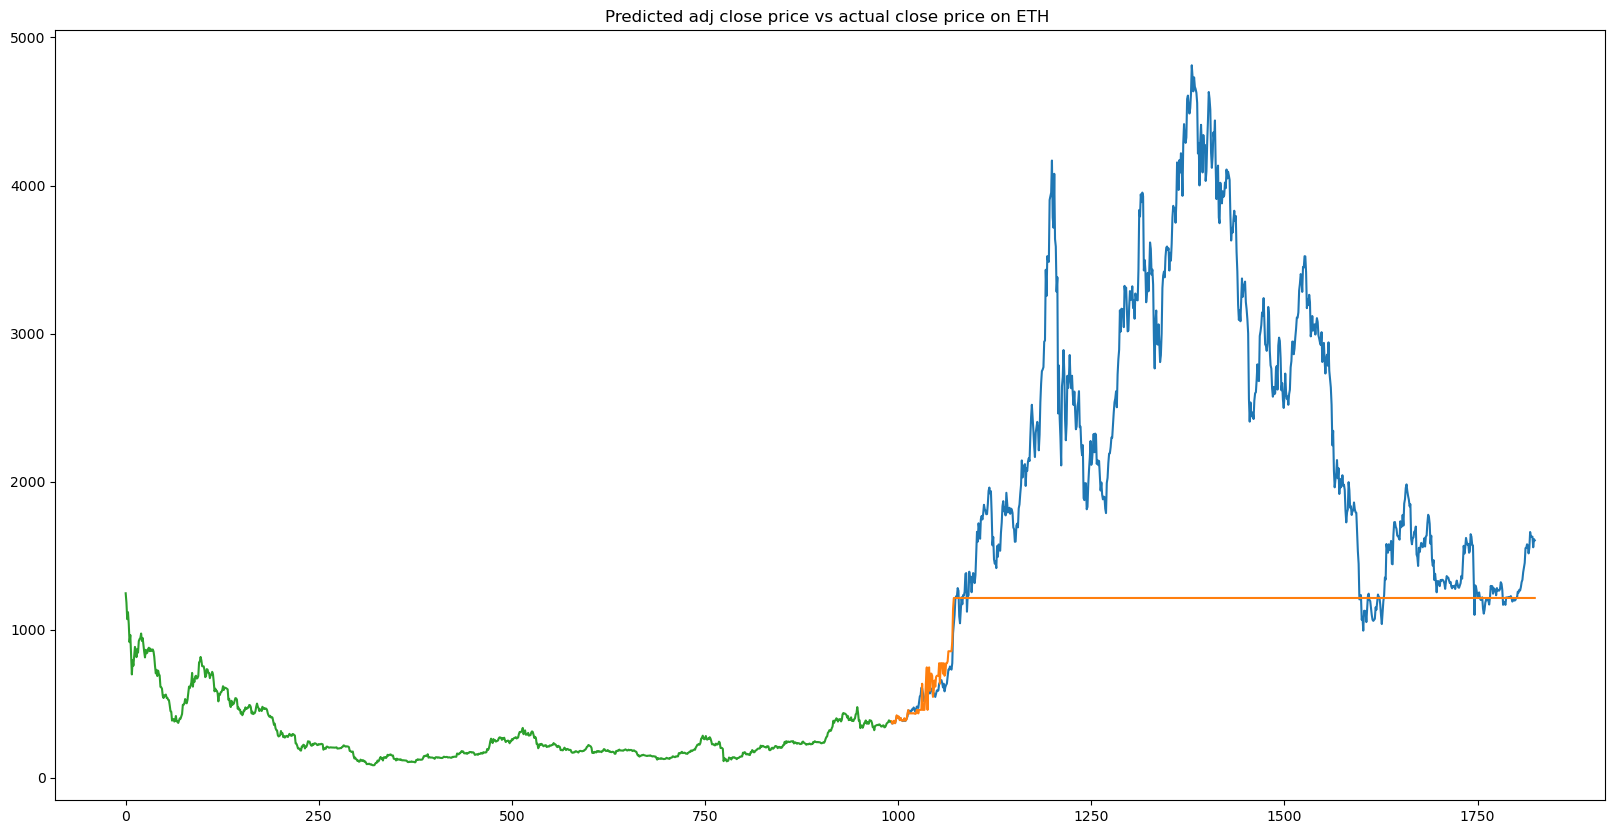

In [27]:
#split into train and validation
train = eth_new[:990]
valid = eth_new[990:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
print('Model Fitted!')

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)


acc = r2_score(valid['Close'], preds)*100
print(acc)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close']);
plt.title('Predicted adj close price vs actual close price on ETH ');


### Linear Regression

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.



#### OnBTC

Model Fitted!
RMSE is 1622.5684651333795
98.75857637699832


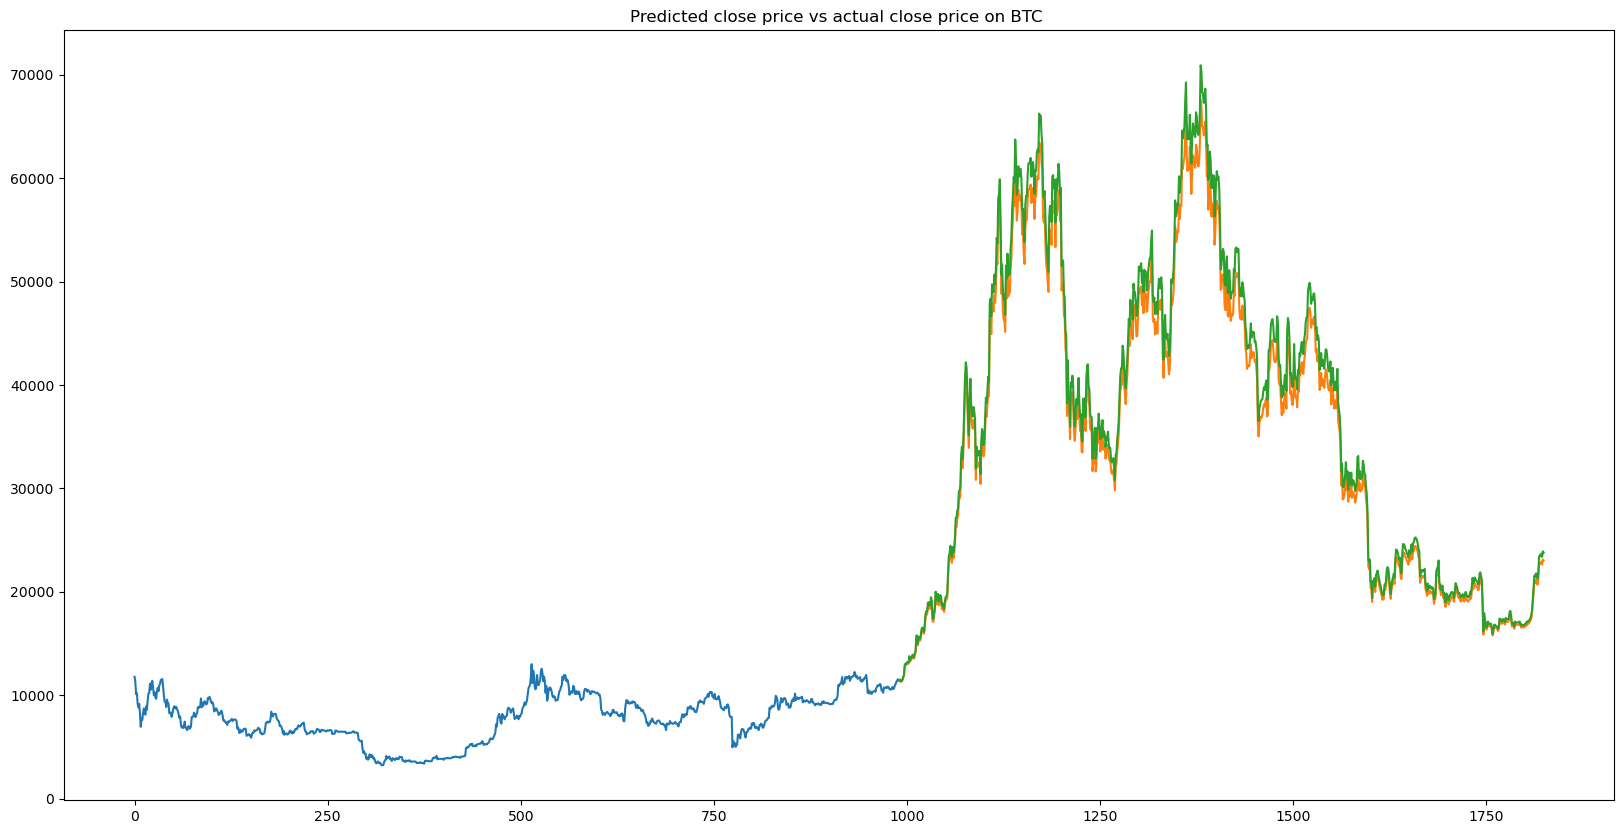

In [28]:
#split into train and validation
train = btc_new[:990]
valid = btc_new[990:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model Fitted!')

#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

acc = r2_score(valid['Close'], preds)*100
print(acc)


#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = btc_new[990:].index
train.index = btc_new[:990].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']]);
plt.title('Predicted close price vs actual close price on BTC ');

#### On ETH

Model Fitted!
RMSE is 232.11432952067082
95.40152477723696


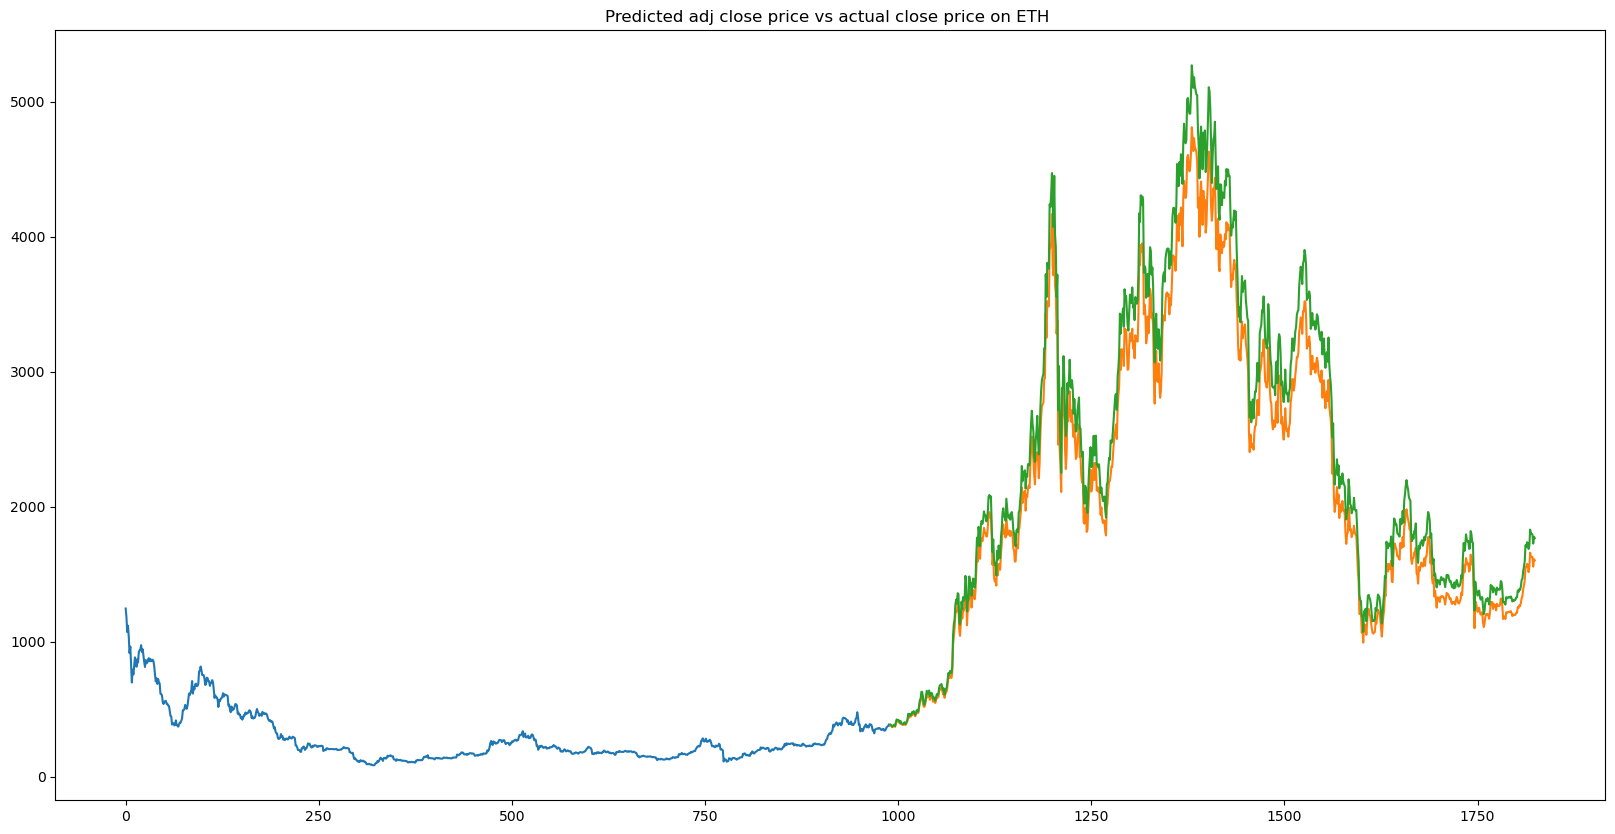

In [29]:
#split into train and validation
train = eth_new[:990]
valid = eth_new[990:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model Fitted!')

#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)


acc = r2_score(valid['Close'], preds)*100
print(acc)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = eth_new[990:].index
train.index = eth_new[:990].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']]);
plt.title('Predicted adj close price vs actual close price on ETH ');

### LSTM

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

 - The input gate: The input gate adds information to the cell state

 - The forget gate: It removes the information that is no longer required by the model

 - The output gate: Output Gate at LSTM selects the information to be shown as output


#### On BTC

930/930 - 22s - loss: 1.7828e-04 - 22s/epoch - 24ms/step
Fitting Model
27/27 [==============================] - 1s 7ms/step
RMSE is 3260.498489307604
93.64180148144683


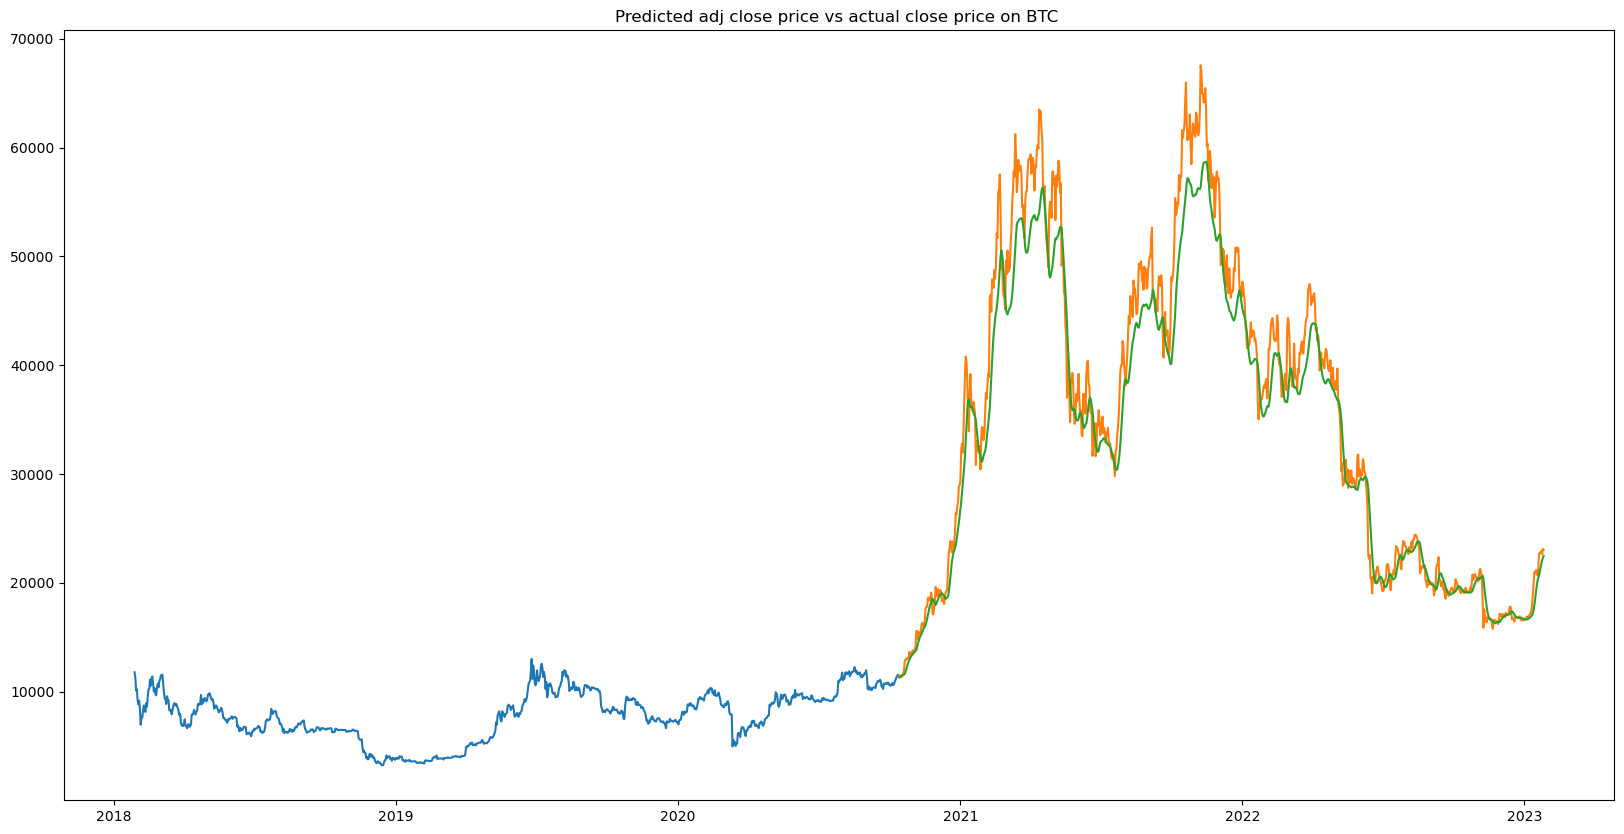

In [30]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error
#creating dataframe
btc_lstm = pd.DataFrame(index=range(0,len(btc_df)),columns=['Date', 'Close'])
for i in range(0,len(btc_df)):
    btc_lstm['Date'][i] = btc_df['Date'][i]
    btc_lstm['Close'][i] = btc_df['Close'][i]

#setting index
btc_lstm.index = btc_lstm.Date
btc_lstm.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = btc_lstm.values

train = dataset[0:990,:]
valid = dataset[990:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
print('Fitting Model')
#predicting 246 values, using past 60 from the train data
inputs = btc_lstm[len(btc_lstm) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(mean_squared_error(closing_price,valid))
print('RMSE is',rms)

acc = r2_score(closing_price,valid)*100
print(acc)


#for plotting
train = btc_lstm[:990]
valid = btc_lstm[990:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']]);
plt.title('Predicted adj close price vs actual close price on BTC ');


#### On ETH

[[1246.010009765625]
 [1182.3599853515625]
 [1071.1300048828125]
 ...
 [1556.6042398403667]
 [1611.7110426119652]
 [1603.1059328512101]]
930/930 - 14s - loss: 1.1688e-04 - 14s/epoch - 15ms/step
Fitting Model
27/27 [==============================] - 1s 8ms/step
RMSE is 374.73902658501675
83.006914672748


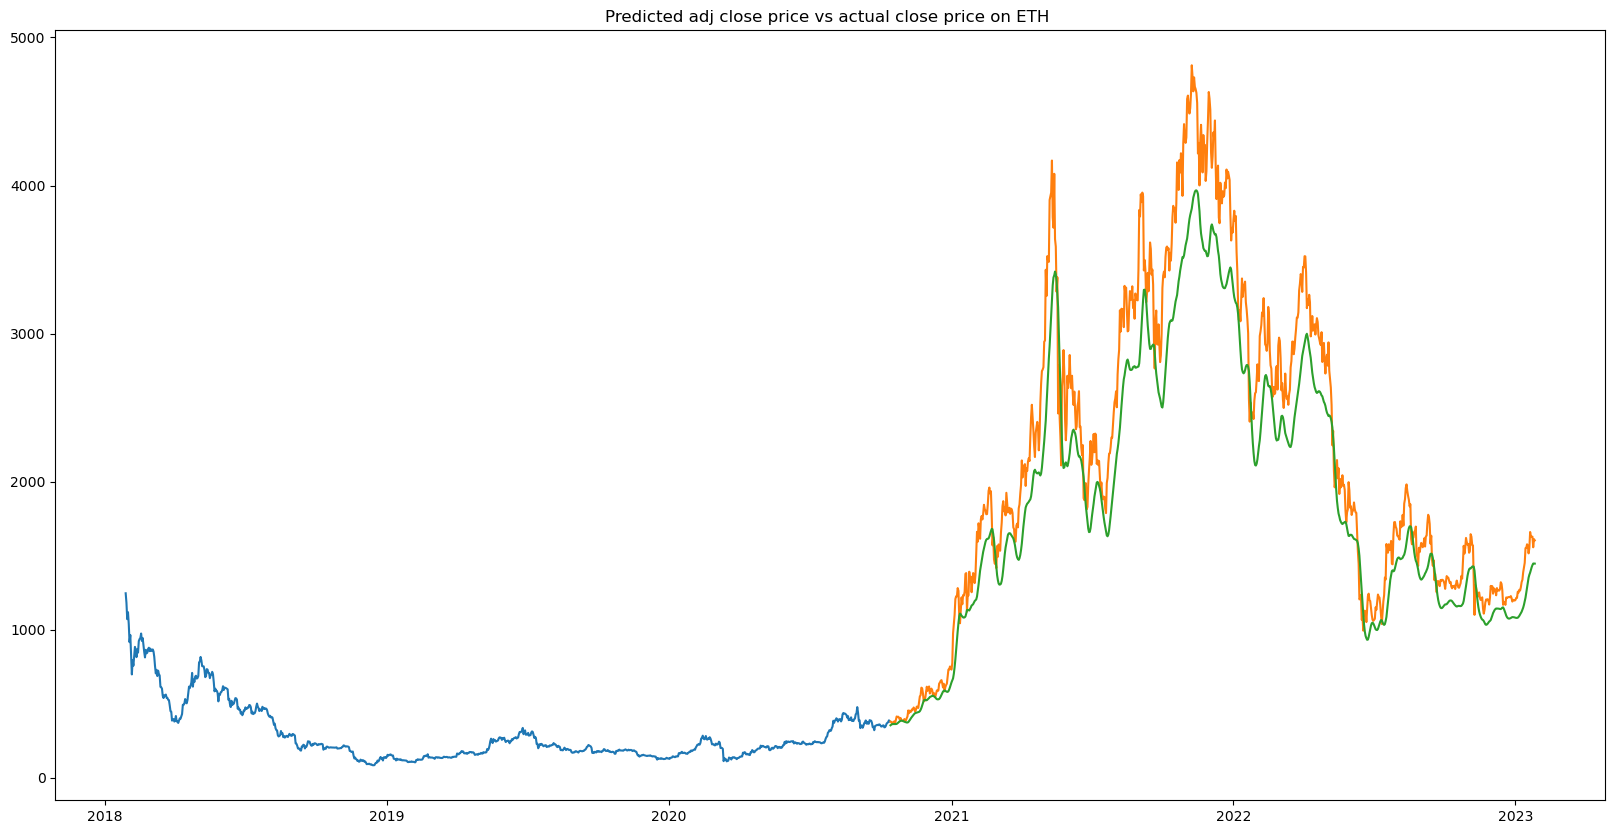

In [31]:
#creating dataframe
eth_lstm = pd.DataFrame(index=range(0,len(eth_df)),columns=['Date', 'Close'])
for i in range(0,len(eth_df)):
    eth_lstm['Date'][i] = eth_df['Date'][i]
    eth_lstm['Close'][i] = eth_df['Close'][i]

#setting index
eth_lstm.index = eth_lstm.Date
eth_lstm.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = eth_lstm.values
print(dataset)
train = dataset[0:990,:]
valid = dataset[990:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
print('Fitting Model')
#predicting 246 values, using past 60 from the train data
inputs = eth_lstm[len(eth_lstm) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(mean_squared_error(closing_price,valid))
print('RMSE is',rms)

acc = r2_score(closing_price,valid)*100
print(acc)

#for plotting
train = eth_lstm[:990]
valid = eth_lstm[990:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']]);
plt.title('Predicted adj close price vs actual close price on ETH ');

#### Inference

Wow! The LSTM model can be tuned for various parameters such as changing the number of LSTM layers, adding dropout value or increasing the number of epochs. But are the predictions from LSTM enough to identify whether the stock price will increase or decrease.



Stock price is affected by the news about the company and other factors like demonetization or merger/demerger of the companies. There are certain intangible factors as well which can often be impossible to predict beforehand